# Section

In [1]:
from pint import UnitRegistry
import sympy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
from IPython.display import display

In [2]:
sys.path.append('./')
from Section import Section

initialization

In [3]:
ureg = UnitRegistry()
sympy.init_printing()

Define sympy parameters

In [4]:
A, A0, t, t0, a, b, h, L = sympy.symbols('A A_0 t t_0 a b h L', positive=True)

define graph

In [5]:
stringers = {1:[(sympy.Integer(0),h),A],
             2:[(a/2,h),A],
             3:[(a,h),A],
             4:[(a-b,sympy.Integer(0)),A],
             5:[(b,sympy.Integer(0)),A]}

panels = {(1,2):t,
          (2,3):t,
          (3,4):t,
          (4,5):t,
          (5,1):t}

In [6]:
S1 = Section(stringers, panels)

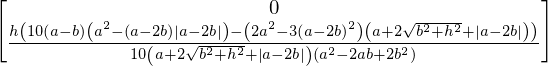

In [7]:
S1.ct

In [8]:
S1.symmetry

[{'edges': [((1, 2), (2, 3)), ((3, 4), (5, 1)), (4, 5)],
  'nodes': [(1, 3), (2, 2), (4, 5)]},
 {'edges': [], 'nodes': []}]

In [9]:
values = [(A, 150 * ureg.millimeter**2),(A0, 250  * ureg.millimeter**2),(a, 80 * ureg.millimeter), \
          (b, 20 * ureg.millimeter),(h, 75 * ureg.millimeter),(L, 2000 * ureg.millimeter)]
datav = [(v[0],v[1].magnitude) for v in values]

In [10]:
start_pos={ii: [float(S1.g.node[ii]['ip'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

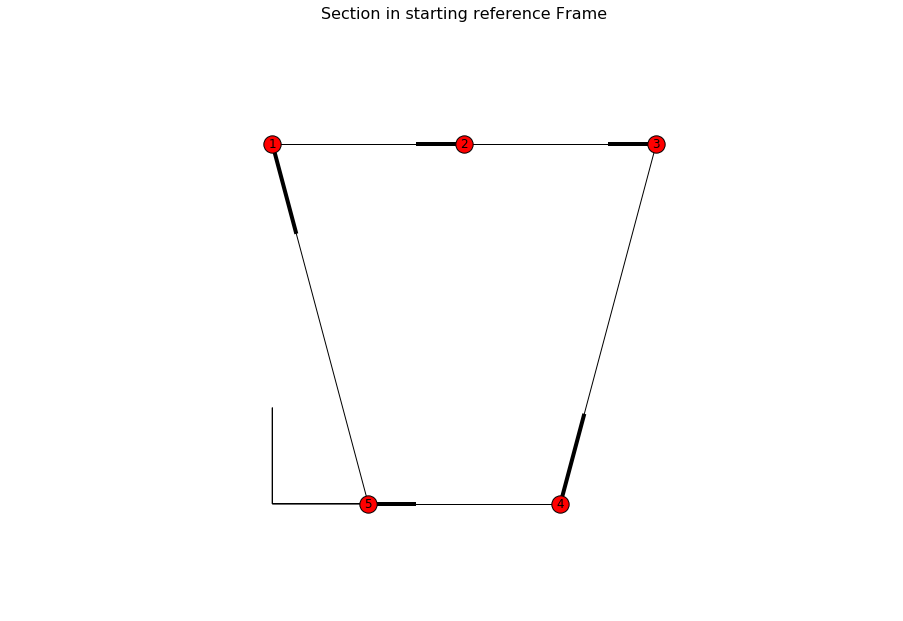

In [11]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

In [12]:
#positions={ii: S1.g.node[ii]['pos'].subs(datav) for ii in S1.g.nodes() }
positions={ii: [float(S1.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }
#positions

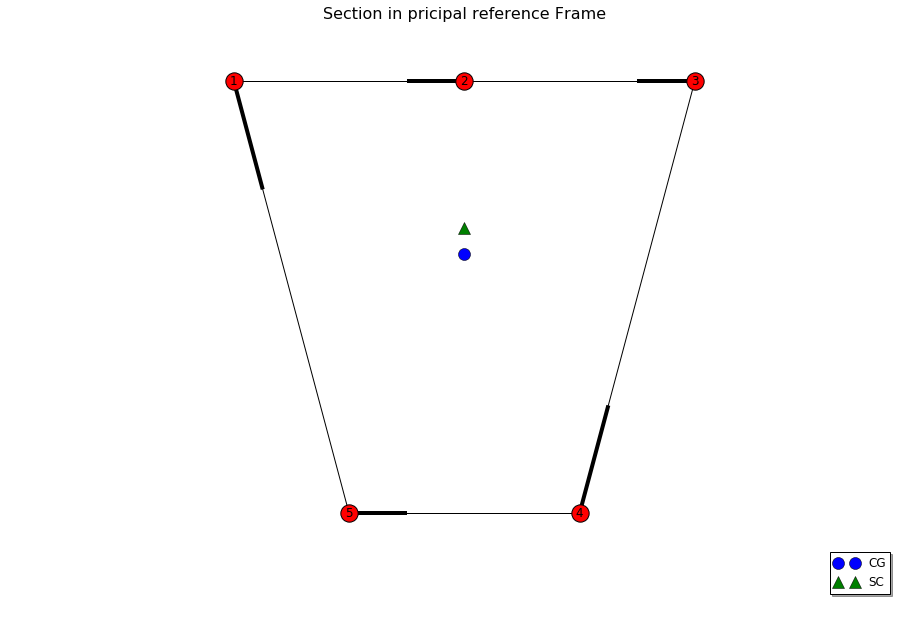

In [13]:
x_ct, y_ct = S1.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

## Compute axial loads in Stringers

We first define some symbols:

In [14]:
Tx, Ty, Nz, Mx, My, Mz, F, ry, ry, mz = sympy.symbols('T_x T_y N_z M_x M_y M_z F r_y r_x m_z')

In [41]:
S1.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=0, _My=0, _Mz=Mz)

In [42]:
S1.compute_stringer_actions()

In [43]:
S1.N

In [44]:
S1.compute_panel_fluxes()

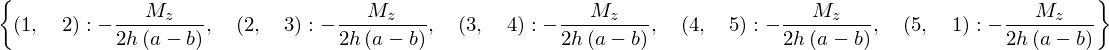

In [47]:
S1.q